# HW3 Support Vector Machine and Decision Trees

# Due on 4/27 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

Type your code here

In [4]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
from sklearn.model_selection import train_test_split
target = df['had_affair']
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('had_affair',axis=1),
                                                df['had_affair'], train_size=0.8,random_state=101)

In [6]:
from sklearn.metrics import classification_report, accuracy_score
educ_children = df[['educ', 'children']].as_matrix
model.fit(X_train,Y_train)

predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print('Accuracy score: %s ' % round((accuracy_score(Y_test,predictions)),2))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

Accuracy score: 0.71 


### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [7]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel='linear', C=2**-5)
model.fit(X_train,Y_train)
print (model)
# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

SVC(C=0.03125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       850
           1       0.64      0.25      0.36       424

    accuracy                           0.70      1274
   macro avg       0.68      0.59      0.59      1274
weighted avg       0.69      0.70      0.66      1274

Accuracy Score: 0.7 


In [8]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel='linear', C=2**5)
model.fit(X_train,Y_train)
print (model)
# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),2))

SVC(C=32, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

Accuracy Score: 0.71 


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [9]:
model = svm.SVC(kernel='rbf', C=2**5, gamma=2**-5)
model.fit(X_train,Y_train)
print(model)
# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

SVC(C=32, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

Accuracy Score: 0.692 


In [10]:
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

Accuracy Score: 0.711 


In [11]:
model = svm.SVC(kernel='rbf', C=2**-5, gamma=0.1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.00      0.00      0.00       424

    accuracy                           0.67      1274
   macro avg       0.33      0.50      0.40      1274
weighted avg       0.45      0.67      0.53      1274

Accuracy Score: 0.667 


In [12]:
model = svm.SVC(kernel='rbf',C=1, gamma=0.1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))


              precision    recall  f1-score   support

           0       0.72      0.89      0.80       850
           1       0.59      0.31      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

Accuracy Score: 0.7 


In [13]:
model = svm.SVC(kernel='rbf', C=2**5, gamma=1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       850
           1       0.47      0.33      0.39       424

    accuracy                           0.65      1274
   macro avg       0.59      0.57      0.57      1274
weighted avg       0.63      0.65      0.64      1274

Accuracy Score: 0.653 


In [14]:
model = svm.SVC(kernel='rbf', C=1, gamma=1)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66      0.62      1274

Accuracy Score: 0.658 


In [15]:
model = svm.SVC(kernel='rbf',C=2**5, gamma=2)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       850
           1       0.42      0.19      0.26       424

    accuracy                           0.64      1274
   macro avg       0.55      0.53      0.51      1274
weighted avg       0.59      0.64      0.60      1274

Accuracy Score: 0.642 


In [16]:
model = svm.SVC(kernel='rbf',C=1, gamma=2)
model.fit(X_train,Y_train)

# Needed for classification report
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print('Accuracy Score: %s ' % round((accuracy_score(Y_test, predictions)),3))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       850
           1       0.40      0.16      0.23       424

    accuracy                           0.64      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.64      0.59      1274

Accuracy Score: 0.642 


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

For linear the c parameter that gave a good accuracy score was 2**5, this means that there is less room for misclassification.



For rbf, the c parameter that gave better accuracy score was 1. The gamma parameter that would allow a higher accuracy score are as it approuches zero

The accuracy scores were similar so either options would be good.

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [17]:
X = df.drop('had_affair',axis=1)
Y = df['had_affair']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1200  103]
 [ 417  190]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1303
           1       0.65      0.31      0.42       607

    accuracy                           0.73      1910
   macro avg       0.70      0.62      0.62      1910
weighted avg       0.71      0.73      0.69      1910

0.7277486910994765


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [20]:
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1191  112]
 [ 402  205]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.65      0.34      0.44       607

    accuracy                           0.73      1910
   macro avg       0.70      0.63      0.63      1910
weighted avg       0.72      0.73      0.70      1910

0.7308900523560209


In [21]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1191  112]
 [ 402  205]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.65      0.34      0.44       607

    accuracy                           0.73      1910
   macro avg       0.70      0.63      0.63      1910
weighted avg       0.72      0.73      0.70      1910

0.7308900523560209


In [22]:
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1200  103]
 [ 417  190]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1303
           1       0.65      0.31      0.42       607

    accuracy                           0.73      1910
   macro avg       0.70      0.62      0.62      1910
weighted avg       0.71      0.73      0.69      1910

0.7277486910994765


In [23]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1200  103]
 [ 417  190]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1303
           1       0.65      0.31      0.42       607

    accuracy                           0.73      1910
   macro avg       0.70      0.62      0.62      1910
weighted avg       0.71      0.73      0.69      1910

0.7277486910994765


In [24]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1185  118]
 [ 392  215]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.65      0.35      0.46       607

    accuracy                           0.73      1910
   macro avg       0.70      0.63      0.64      1910
weighted avg       0.72      0.73      0.71      1910

0.7329842931937173


In [25]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1185  118]
 [ 392  215]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.65      0.35      0.46       607

    accuracy                           0.73      1910
   macro avg       0.70      0.63      0.64      1910
weighted avg       0.72      0.73      0.71      1910

0.7329842931937173


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Answer: I do not think criterion is important to the case. I also do not think max_depth is important. All the cases have given almost identical results, therefore they do not make so much of a difference. 


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydot
import pydot 

features = list(df.columns[1:])
features

['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

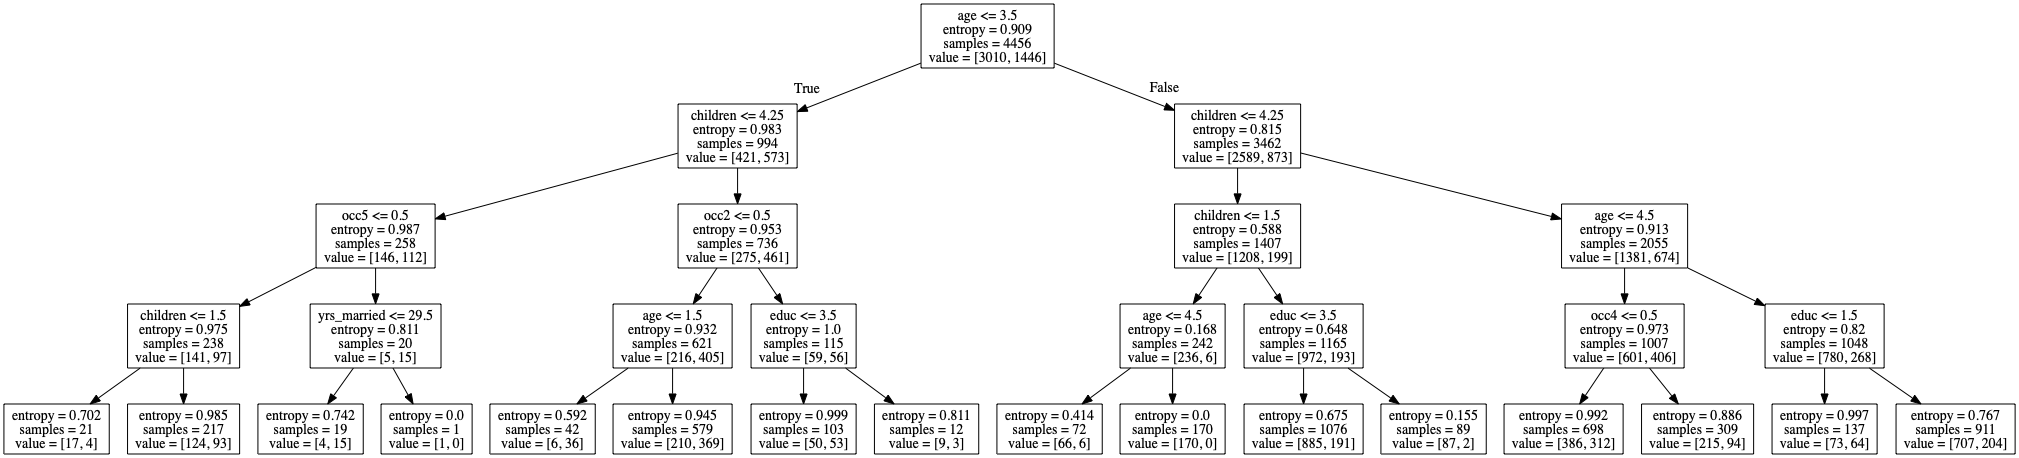

In [27]:
#type your code here
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your code here

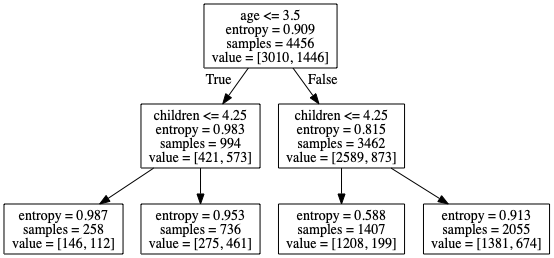

In [28]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees
model1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model1.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

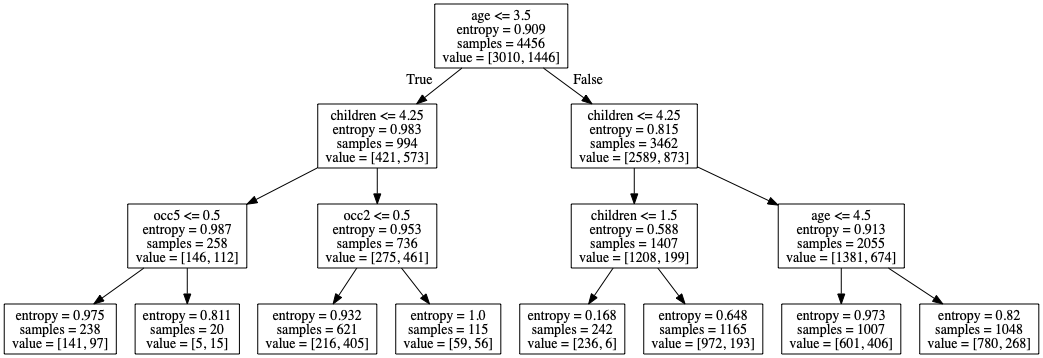

In [29]:
model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(model2, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

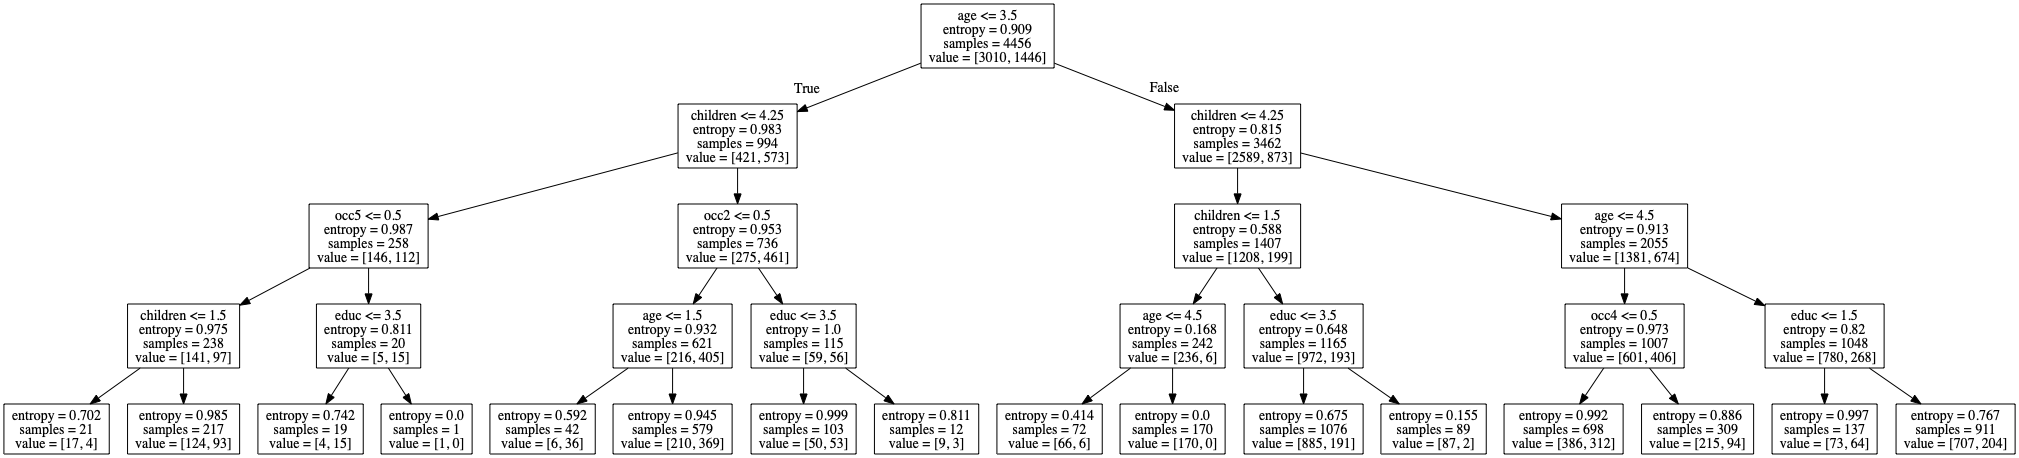

In [30]:
model3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model3.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(model3, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(round(accuracy_score(y_test, predictions),2))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1303
           1       0.65      0.35      0.46       607

    accuracy                           0.73      1910
   macro avg       0.70      0.63      0.64      1910
weighted avg       0.72      0.73      0.71      1910

0.73
